# Nota de Estudo — Revisão de Trocador de Calor com Condensação (Newton-Raphson)

> **Autor:** Fábio Magnani (fabio.magnani@ufpe.br)  
> **Curso:** Engenharia Mecânica - UFPE  
> **Início do desenvolvimento:** 31/08/2025  
> **Primeira publicação:** 08/09/2025   
> **Versão Atual:** v-2025-09-08-a (fase de teste técnico no Colab, teste didático-pedagógico com estudantes e início da revisão final de código/texto)

---

## Objetivo
Revisar o Método de Newton-Raphson usando como exemplo um problema de trocador de calor de *Design of Thermal Systems*.

## Referência
- Stoecker, W. F. *Design of Thermal Systems*, chap. 5, 3rd ed., McGraw-Hill, 1989.

## Estrutura
- Enunciado do problema-exemplo (trocador de calor com condensação) e o seu modelo matemático.
- Análise de escala do problema-exemplo.
- Estudo paramétrico do problema-exemplo ($U$ variável).
- Estudo paramétrico do problema-exemplo simplificado ($U$ constante).
- Revisão do método de Newton-Raphson.
- Solução do problema-exemplo pelo método de Newton-Raphson.
- Discussões finais.
- Propostas de estudos adicionais.



::: {.content-visible unless-format="revealjs"}

## Notação
- $w$: vazão mássica [kg/s]
- $Q$: potência térmica requerida [kW]
- $f(w)$: função resíduo usada no método de Newton-Raphson [kW]
- $T_e$, $T_v$: temperaturas de entrada da água e do vapor [°C]
- $c_p$: calor específico a pressão constante [kJ/(kg·K)]
- $A$: área efetiva de troca térmica [m$^2$]
- $h$: passo para a diferença finita à frente
  
:::

In [ ]:
## Problema-exemplo

**Enunciado físico**: O trocador da Fig. 1 aquece água a partir da condensação de vapor. A água entra a $T_e=30^\circ\mathrm{C}$, o vapor entra a $T_v=50^\circ\mathrm{C}$, 
e o condensado sai também a $50^\circ\mathrm{C}$. Queremos determinar a vazão mássica de água, $w$ (kg/s), tal que o calor transferido seja $Q=50\,\mathrm{kW}$.  A área de troca é $A=1{,}4\,\mathrm{m^2}$ e o coeficiente global de transferência de calor, baseado nessa área, é função de $w$:

$$
\frac{1}{U}=\frac{0{,}0445}{w^{0{,}8}}+0{,}185 \qquad [\mathrm{m^2\,K/kW}].
$$

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-newton-raphson-fig-01.png"
       alt="Trocador de Calor de Fluxo em Contra-Corrente"
       width="480" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 1.</b> Problema-exemplo: trocador de calor com condensação de vapor.</figcaption>
</figure>



Pela 1a Lei aplicada ao lado frio, temos que:

$$
Q = w c_p (T_s - T_e) \tag{2}
$$

A **Equação do Trocador de Calor** é:

$$
Q = U A \Delta T_{LM}
= U A \frac{(T_v-T_s)-(T_v-T_e)}{\ln{\frac{(T_v-T_s)}{(T_v-T_e)}}} 
= U A \frac{(T_e-T_s)}{\ln{\frac{(T_v-T_s)}{(T_v-T_e)}}}    \tag{3}
$$

Comparando Eq.2 e Eq.3 vemos que:

$$
w c_p (T_s - T_e) = - U A  \frac{(T_s-T_e)}{\ln{\frac{(T_v-T_s)}{(T_v-T_e)}}}  
\implies   \frac{(T_v-T_s)}{(T_v-T_e)} = e^{-\frac{U A}{w c_p}} 
\implies   (T_v-T_s) = (T_v-T_e) e^{-\frac{U A}{w c_p}}   \tag{4}
$$

Ou:

$$
(T_s-T_v) = - (T_v-T_e) e^{-\frac{U A}{w c_p}}  + (T_e-T_e) 
\implies  T_s = T_e + (T_v-T_e)  - (T_v-T_e) e^{-\frac{U A}{w c_p}}    \tag{5}
$$

Que, finalmente, se transforma da **Equação do Trocador de Calor com Condensação** (*i.e.,* o lado quente opera com temperatura constante):

$$
T_s = T_e + (T_v - T_e) \left(1 - e^{-UA/ w c_p}\right)  \tag{6}
$$

Substituindo a Eq. 6 na Eq.2, temos:

$$
Q  = w c_p (T_v - T_e) \left(1 - e^{-UA/ w c_p}\right)  \tag{7}
$$

Reescrevendo a Eq.1:

$$ 
U  = \frac{w}{0,0445 w^{0,2} +0,185 w}  \tag{8}
$$

Substituindo a Eq.8 na Eq.7, chegamos no **modelo matemático** do problema-exemplo:

$$
\boxed {Q  = w c_p (T_v - T_e) \left[ 1 - e^{-\frac{A}{ c_p \left( 0,0445 w^{0,2} + 0,185 w \right) } } \right] }   \tag{9}
$$

**Enunciado matemático**: determine o valor de $w$ que satisfaça a Eq.9 para os valores de $Q=50$ kW; $A=1,4 \text{m}^2$; $c_p=4,2$ kJ/kg$\cdot$K; $T_v = 50^\circ\mathrm{C}$ e $T_e = 30^\circ\mathrm{C}$.



## Análise de escala do modelo matemático

Para facilitar a análise, podemos escrever a Eq.9 assim:
$$
Q(w)= w\,c_p\,\Delta T\,[\,1-e^{-\xi}\,] \tag{10}
$$

Com:   
$$
\Delta T=(T_v-T_e) \tag{11}
$$ 

e

$$
\xi(w)=\dfrac{A}{c_p\,(\,0{,}0445\,w^{0{,}2}+0{,}185\,w\,)} \tag{12}
$$




### Limite assintótico quando a vazão tende a zero

Quando a vazão tende a zero ($w\to 0$), vemos que $\xi\to\infty$ e, consequentemente, $(1-e^{-\xi})\to 1$. 
Temos, então, que: 

$$
     w\to 0  \implies Q \to 0 \tag{13}
$$

O que não nos ajuda muito. Vamos ver então o que acontece com a derivada de $Q$. 
Derivando a Eq. 10 em relação a $w$, alcançamos:

$$
Q'(w)=c_p\Delta T(1-e^{-\xi})-\Delta T A e^{-\xi}\frac{0,0089 w^{0,2}+0,185 w}{(0,0445 w^{0,2}+0,185 w)^2} \tag{14}
$$

Portanto, como o segundo termo envolve uma exponencial multiplicada por uma potência, e como a exponencial domina a potência, 
temos que o segundo termo tende a zero. Em outras palavras:

$$
     w\to 0  \implies Q' \to c_p\Delta T \tag{15}
$$

Em outras palavras, quando a vazão é muito baixa, o calor é proporcional à vazão ($Q\propto w$). Logo, para uma primeira estimativa, 
linearizando a curva (usando $w \approx \dfrac{Q}{c_p\,\Delta T}$), podemos propor que a vazão para o fluxo $Q=50$ kW 
pode ser estimada por $w = 50/(4,2 \cdot 20) = 0,595$ kg/s.


### Limite assintótico quando a vazão tende ao infinito 

 Quando a vazão tende ao infinito ($w\to \infty$), temos que $w\,c_p\,\Delta T \to \infty$ ao mesmo tempo 
que $(1-e^{-\xi})\to 0$, e, por isso, precisamos de uma análise um pouco mais profunda.  Primeiro, vemos que, 
quando a vazão cresce muito ($w\to \infty$), quem controla $\xi$ é o termo $0,185 w$. Então: 

$$
w\to\infty \;\Rightarrow\; \xi(w)\approx \dfrac{A}{0{,}185\,c_p}\,\dfrac{1}{w}  \tag{16} 
$$

Lembrando que a Série de Taylor é dada por:

$$
  y(x)= y(a) + y'(a)(x-a) +  \sum_{k=2}^{\infty}\frac{y^{(k)}(a)}{k!}\,(x-a)^k  \tag{17}
$$

E aplicando-a ao termo ($1-e^{-\xi}$), expandindo em torno de $\xi=0$, obtemos: 

$$
  1-e^{-\xi}=\xi-\tfrac{\xi^2}{2}+O(\xi^3)\sim \xi  \tag{18}
$$


Logo:

$$
w\to \infty \implies Q\to  w c_p \Delta T  \frac{A}{0,185 w c_p} \implies  Q = \frac {A }{0,185} \Delta T    \tag{19} 
$$


Então, quando a vazão cresce muito, podemos prever que a taxa de transferência de calor, $Q$, 
tende ao valor de $\frac{1,4}{ 0,185} 20 = 151,4$ kW.

## Estudo Paramétrico 1 — influência de $w$ em $U$, $T_s$ e $Q$, considerando $U$ variável

Vamos agora analisar numericamente como $U$ (Eq.8), $T_s$ (Eq.6) e $Q$ (Eq. 7) se comportam em função de $w$.    

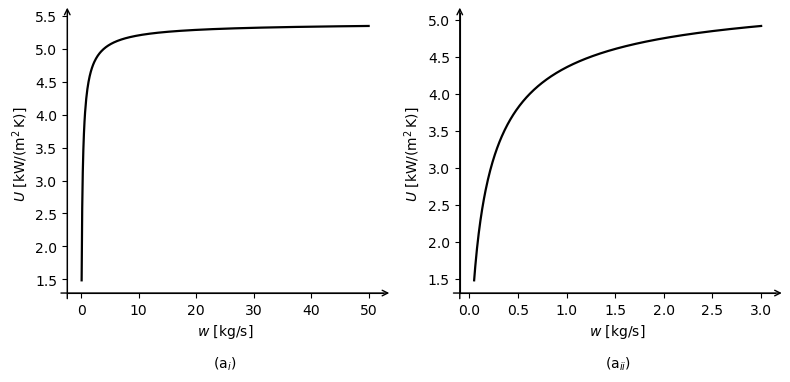

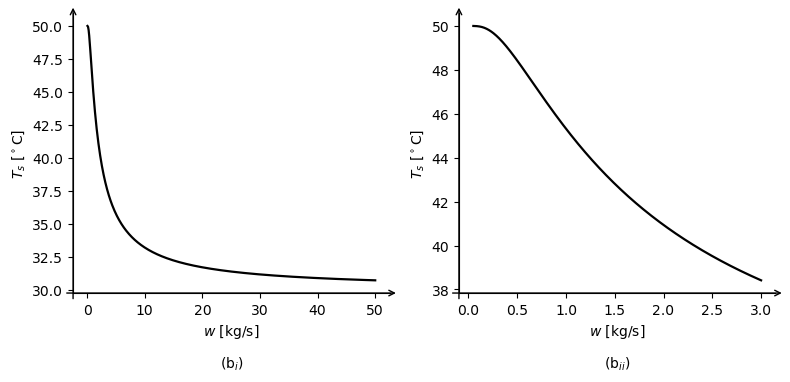

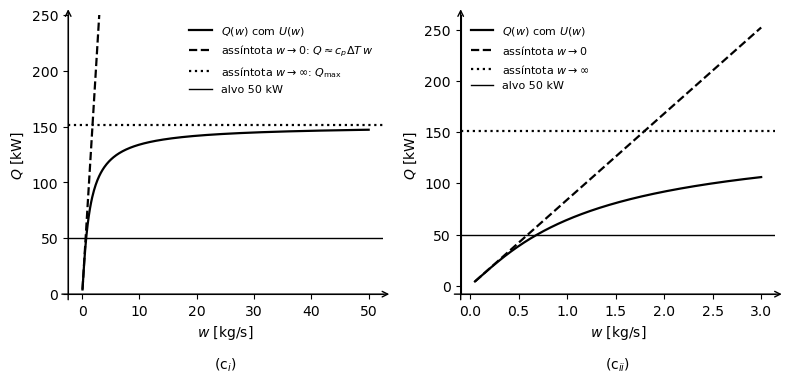

In [2]:

# --- Estudo Paramétrico 1: U = U(w) e assíntotas — P&B, sem títulos, só eixos, COM setas e (a)…(f) centrados ---


import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# ===== estilo global (P&B, sem grid, traços distintos) =====
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.prop_cycle'] = (
    cycler('color', ['k']) * cycler('linestyle', ['-', '--', '-.', ':'])
)
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.frameon'] = False

def axes_minimal_with_arrows(ax):
    """Mostra só eixos esquerdo e inferior e desenha setas nas extremidades."""
    for side in ('top', 'right'):
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    # setas nos eixos (coordenadas do eixo: 0..1)
    ax.annotate('', xy=(1.02, 0.0), xytext=(-0.02, 0.0),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))
    ax.annotate('', xy=(0.0, 1.02), xytext=(0.0, -0.02),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))

def panel_label_center(ax, label, y_offset=-0.22):
    """Rótulo (a), (b), … centralizado sob cada subplot."""
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# Parâmetros
Q_target = 50.0  # kW (alvo)
Te = 30.0        # °C
Tv = 50.0        # °C
cp = 4.2         # kJ/kgK
A  = 1.4         # m²
a = 0.0445
b = 0.185
dT = Tv - Te

# Funções com U(w)
def U_func(w):
    return w / (a*w**0.2 + b*w)

def Q_func(w):
    return w*cp*dT*(1 - np.exp(-(A/(cp*(a*w**0.2 + b*w)))))

def Ts_func(w):
    return Te + dT*(1 - np.exp(-(A/(cp*(a*w**0.2 + b*w)))))

# Faixas de w
w1 = np.linspace(0.05, 50.0, 500)   # ampla
w2 = np.linspace(0.05, 3.0,  500)   # zoom

# Curvas com U(w)
U1, U2   = U_func(w1),   U_func(w2)
Q1, Q2   = Q_func(w1),   Q_func(w2)
Ts1, Ts2 = Ts_func(w1),  Ts_func(w2)

# Assíntotas
Qmax = (A/0.185)*dT          # platô para w -> infinito
Qlin1 = cp*dT*w1             # reta tangente em w=0
Qlin2 = cp*dT*w2

# --- U(w) ---
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(w1, U1)
axs[0].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[0].set_ylabel(r'$U\ [\mathrm{kW/(m^2\,K)}]$')
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(a$_{i}$)')

axs[1].plot(w2, U2)
axs[1].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[1].set_ylabel(r'$U\ [\mathrm{kW/(m^2\,K)}]$')
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(a$_{ii}$)')

plt.tight_layout(); plt.show()

# --- Ts(w) com U(w) ---
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(w1, Ts1)
axs[0].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[0].set_ylabel(r'$T_s\ [^\circ\mathrm{C}]$')
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(b$_{i}$)')

axs[1].plot(w2, Ts2)
axs[1].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[1].set_ylabel(r'$T_s\ [^\circ\mathrm{C}]$')
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(b$_{ii}$)')

plt.tight_layout(); plt.show()

# --- Q(w) com U(w) + assíntotas ---
fig, axs = plt.subplots(1, 2, figsize=(8,4))

axs[0].plot(w1, Q1, label=r'$Q(w)$ com $U(w)$')
axs[0].plot(w1, Qlin1, linestyle='--', label=r'assíntota $w\to0$: $Q\approx c_p\Delta T\,w$')
axs[0].axhline(Qmax, linestyle=':', label=r'assíntota $w\to\infty$: $Q_{\max}$')
axs[0].axhline(Q_target, linestyle='-', linewidth=1.0, label='alvo 50 kW')
axs[0].set_ylim(0, 250)
axs[0].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[0].set_ylabel(r'$Q\ [\mathrm{kW}]$')
axs[0].legend()
axes_minimal_with_arrows(axs[0]); panel_label_center(axs[0], '(c$_{i}$)')

axs[1].plot(w2, Q2, label=r'$Q(w)$ com $U(w)$')
axs[1].plot(w2, Qlin2, linestyle='--', label=r'assíntota $w\to0$')
axs[1].axhline(Qmax, linestyle=':', label=r'assíntota $w\to\infty$')
axs[1].axhline(Q_target, linestyle='-', linewidth=1.0, label='alvo 50 kW')
axs[1].set_xlabel(r'$w\ [\mathrm{kg/s}]$')
axs[1].set_ylabel(r'$Q\ [\mathrm{kW}]$')
axs[1].legend()
axes_minimal_with_arrows(axs[1]); panel_label_center(axs[1], '(c$_{ii}$)')

plt.tight_layout(); plt.show()


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <figcaption><b>Figura 2.</b> Comportamento de $U$, $T_s$ e $Q$ em função de $w$, considerando $U(w)$.</figcaption>
</figure>



Os gráficos da Fig.2 são apresentados em duas colunas; a da esquerda com $w$ variando em uma faixa maior [0 a 50],
para enfatizar a assíntota para valores mais altos de $w$ e também a forma total da curva; e a coluna da direita 
mostrando apenas a faixa mais próxima da raiz [0 a 3], o que nos permite tanto ver a raiz da equação ($w \approx 0,7$) 
quanto a assíntota para baixos valores de vazão.

### Comportamento de $U(w)$
- Quando $w\to 0$, vimos que o termo em $w^{0{,}2}$ domina o denominador da Eq.8. Logo, 
$U(w)\sim \dfrac{1}{0{,}0445}\,w^{0{,}8}$ (*i.e.*, $U(w)$ cresce com lei de potência).  
- Para $w\to\infty$, quem domina o denominador é o termo em $w$. Então, 
$U(w)\to \dfrac{1}{0{,}185}\approx 5{,}405\,\mathrm{kW/(m^2\,K)}$ (*i.e.*, $U(w)$ tende a um platô).  
Nas figuras 2(a$_{i}$) e 2(a$_{ii}$), esses dois comportamentos aparecem claramente, primeiro como o crescimento rápido 
em baixas vazões, e depois com a saturação para altas vazões.

### Assíntotas de $Q(w)$ sobrepostas ao gráfico
- Quando $w\to 0$, $Q(w)\approx c_p\,\Delta T\,w$. Com os dados que temos, $c_p\,\Delta T=4{,}2\times 20=84\,\mathrm{kW/(kg/s)}$.  
  A curva de $Q$ coincide com essa reta muito perto de $w=0$.
- Quando $w\to\infty$, $Q(w)\to Q_{\max}$, com
$Q_{\max}=\dfrac{A}{0{,}185}\,\Delta T=\dfrac{1{,}4}{0{,}185}\times 20\approx 151{,}35\,\mathrm{kW}$. No gráfico, essa é 
a linha horizontal que a curva de $Q$ se aproxima por baixo.   
Nas figuras 2(b$_{i}$) e 2(b$_{ii}$), vemos como essas duas assíntotas explicam a curva geral de $Q(w)$, *i.e.*, crescimento quase linear no começo e saturação no fim.

### Raiz provável para $Q=50\,\mathrm{kW}$ em $w\approx 0{,}7$
- Como $50\,\mathrm{kW}\ll Q_{\max}\approx 151{,}35\,\mathrm{kW}$, a solução está bem antes da saturação.  
- Visualmente, a interseção $Q(w)=50$ ocorre em $w\approx 0{,}7\,\mathrm{kg/s}$, coerente com a aproximação 
linear $w\approx Q/(c_p\Delta T)=50/84\approx 0{,}595$ e com a solução numérica que veremos mais abaixo ($w\approx 0{,}693$).  
- Interpretação: ainda estamos no regime quase linear ($Q\propto w$), então controlar $Q$ via $w$ é eficiente nesse ponto.

### Temperatura de saída $T_s(w)$
- Para $w$ pequeno: $\xi$ grande, $1-\exp(-\xi)\to 1$ $\Rightarrow T_s\approx T_v=50^\circ\mathrm{C}$ (a água quase atinge o vapor).  
- Para $w$ grande: $\xi$ pequeno, $1-\exp(-\xi)\sim \xi\propto 1/w$ $\Rightarrow T_s\to T_e=30^\circ\mathrm{C}$ (tempo de residência curto).  

### Leitura de projeto
- As assíntotas dão duas informações chaves sem cálculo: inclinação inicial $84\,\mathrm{kW/(kg/s)}$ e capacidade máxima $\approx 151{,}35\,\mathrm{kW}$.  
- O ponto de operação desejado ($50\,\mathrm{kW}$) fica muito abaixo do platô, com solução única e boa sensibilidade a $w$.  
- Se, no futuro, o alvo se aproximar do platô, aumentar $w$ trará ganhos marginais; seria mais efetivo atuar em $A$ ou em $\Delta T$.


## Estudo Paramétrico 2 — influência de $w$ em $T_s$  e $Q$, considerando $U$ constante.

Neste estudo, faremos algo muito parecido com o estudo anterior. No entanto, vamos considerar $U$ constante
(avaliado em $w=0,7$. Nosso objetivo é compreender os efeitos que $U$ variável tem sobre o comportamento do trocador de calor. 

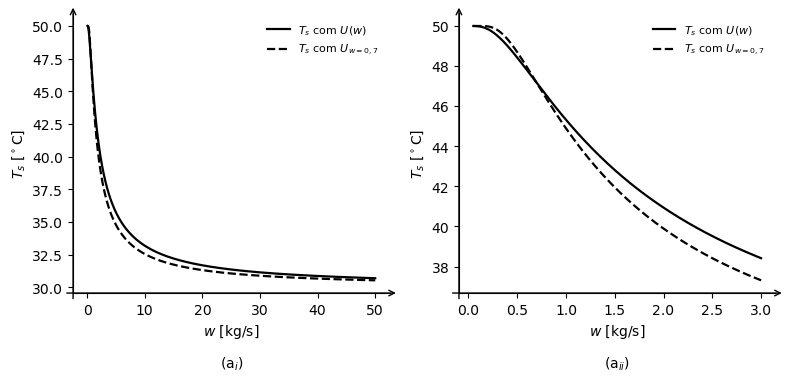

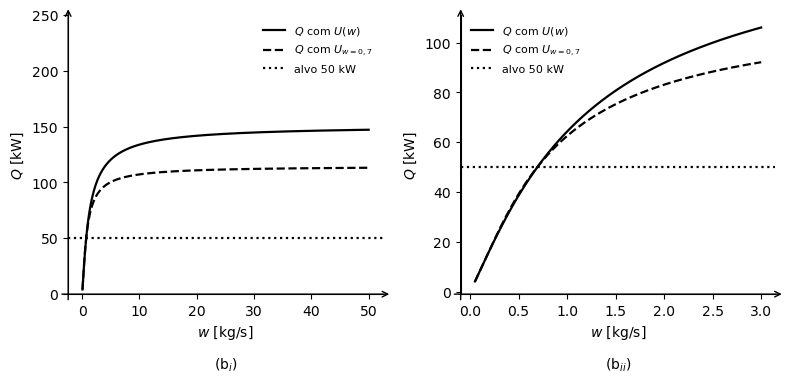

U(0.7) = 4.095096 kW/(m^2·K)


In [3]:


# --- Estudo paramétrico 2: comparação U = constante (em w=0.7) vs U(w)
#     P&B, sem títulos, só eixos, COM setas e rótulos centralizados sob cada gráfico ---

import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# ===== estilo global (P&B, sem grid) =====
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.prop_cycle'] = cycler('color', ['k']) * cycler('linestyle', ['-', '--'])
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.frameon'] = False

def axes_minimal_with_arrows(ax):
    """Mostra só eixos esquerdo e inferior e desenha setas nos eixos (em coords do eixo)."""
    for side in ('top', 'right'):
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    # setas nos eixos (coordenadas do eixo: 0..1)
    ax.annotate('', xy=(1.02, 0.0), xytext=(-0.02, 0.0),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))
    ax.annotate('', xy=(0.0, 1.02), xytext=(0.0, -0.02),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))

def panel_label_center(ax, label, y_offset=-0.22):
    """Rótulo (a), (b), … centralizado sob o subplot."""
    ax.text(0.5, y_offset, label, transform=ax.transAxes,
            ha='center', va='top', fontsize=10)

# Parâmetros
Q_target = 50.0
Te = 30.0
Tv = 50.0
cp = 4.2
A  = 1.4
a  = 0.0445
b  = 0.185
dT = Tv - Te

# U(w) e modelos com U(w)
def U_func(w):
    return w / (a*w**0.2 + b*w)

def Q_varU(w):
    return w*cp*dT*(1 - np.exp(-(A/(cp*(a*w**0.2 + b*w)))))

def Ts_varU(w):
    return Te + dT*(1 - np.exp(-(A/(cp*(a*w**0.2 + b*w)))))

# Modelos com U constante (= U em w_ref)
def Q_constU(w, Uc):
    return w*cp*dT*(1 - np.exp(-(Uc*A)/(w*cp)))

def Ts_constU(w, Uc):
    return Te + dT*(1 - np.exp(-(Uc*A)/(w*cp)))

# U constante: valor em w = 0.7
w_ref = 0.7
U_const = U_func(w_ref)

# Faixas de w
w1 = np.linspace(0.05, 50.0, 500)   # ampla
w2 = np.linspace(0.05, 3.0,  500)   # zoom

# Curvas com U(w) (variável)
Q1v, Q2v   = Q_varU(w1),   Q_varU(w2)
Ts1v, Ts2v = Ts_varU(w1),  Ts_varU(w2)

# Curvas com U constante = U(w_ref)
Q1c, Q2c   = Q_constU(w1, U_const), Q_constU(w2, U_const)
Ts1c, Ts2c = Ts_constU(w1, U_const), Ts_constU(w2, U_const)

# --- Ts(w): U(w) vs U=const ---
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(w1, Ts1v, label=r'$T_s$ com $U(w)$')
axs[0].plot(w1, Ts1c, '--', label=r'$T_s$ com $U_{w=0,7}$')
axs[0].set_xlabel(r'$w\ [\mathrm{kg/s}]$'); axs[0].set_ylabel(r'$T_s\ [^\circ\mathrm{C}]$')
axs[0].legend()
axes_minimal_with_arrows(axs[0])
panel_label_center(axs[0], r'(a$_{i}$)')

axs[1].plot(w2, Ts2v, label=r'$T_s$ com $U(w)$')
axs[1].plot(w2, Ts2c, '--', label=r'$T_s$ com $U_{w=0,7}$')
axs[1].set_xlabel(r'$w\ [\mathrm{kg/s}]$'); axs[1].set_ylabel(r'$T_s\ [^\circ\mathrm{C}]$')
axs[1].legend()
axes_minimal_with_arrows(axs[1])
panel_label_center(axs[1], r'(a$_{ii}$)')

plt.tight_layout(); plt.show()

# --- Q(w): U(w) vs U=const ---
fig, axs = plt.subplots(1, 2, figsize=(8,4))
axs[0].plot(w1, Q1v, label=r'$Q$ com $U(w)$')
axs[0].plot(w1, Q1c, '--', label=r'$Q$ com $U_{w=0,7}$')
axs[0].axhline(Q_target, linestyle=':', label='alvo 50 kW')
axs[0].set_ylim(0, 250)  # mesmo limite do (0–50)
axs[0].set_xlabel(r'$w\ [\mathrm{kg/s}]$'); axs[0].set_ylabel(r'$Q\ [\mathrm{kW}]$')
axs[0].legend()
axes_minimal_with_arrows(axs[0])
panel_label_center(axs[0], r'(b$_{i}$)')

axs[1].plot(w2, Q2v, label=r'$Q$ com $U(w)$')
axs[1].plot(w2, Q2c, '--', label=r'$Q$ com $U_{w=0,7}$')
axs[1].axhline(Q_target, linestyle=':', label='alvo 50 kW')
axs[1].set_xlabel(r'$w\ [\mathrm{kg/s}]$'); axs[1].set_ylabel(r'$Q\ [\mathrm{kW}]$')
axs[1].legend()
axes_minimal_with_arrows(axs[1])
panel_label_center(axs[1], r'(b$_{ii}$)')

plt.tight_layout(); plt.show()

print(f"U(0.7) = {U_const:.6f} kW/(m^2·K)")


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <figcaption><b>Figura 3.</b> Comportamento de $T_s$ e $Q$ em função de $w$, considerando $U$ constante.</figcaption>
</figure>


## Estudo Paramétrico 2 — comparação $U_{w=0,7}$ (constante) vs. $U(w)$ (variável)

Os resultados seguem o esperado. Com o coeficiente global de transferência de calor fixo em $U_{w=0,7}$, o modelo:
- Superestima $Q$ e $T_s$ para $w<0{,}7$, pois o $U(w)$ real é menor nessa faixa.
- Subestima $Q$ e $T_s$ para $w>0{,}7$, pois o $U(w)$ real cresce em direção ao platô $1/0{,}185$.

Comparando ao modelo com $U(w)$, o erro próximo de $w\approx 0{,}7$ é pequeno. 
Se considerarmos toda a faixa de operação, o erro em $T_s$ atinge cerca de $\sim5\%$, 
enquanto o erro em $Q$ pode chegar a $\sim30\%$ em vazões altas; evidenciando a importância 
de usarmos $U(w)$ variavel se quisermos fazer análises globais.

**Conclusão prática.** Usar $U$ constante é razoável para estudarmos o comportamento do trocador em torno
do ponto onde $U$ foi obtido. Já para investigar toda a faixa de vazão (ou operar longe de $w\approx 0{,}7$), 
o erro pode se tornar significativo; nesse caso, vamos preferir o modelo completo com $U(w)$.


## Cálculo do valor de $w$ que satisfaz a condição $Q=50$ kW.

Agora que já analisamos o comportamento analítico e paramétrico da Equação do Trocador de Calor com Condensação (Eq.9),
vamos voltar ao problema inicial, que é determinar o valor de $w$ que satisfaça a condição de $Q=50$ kW. Observando
a Eq.9, percebemos que ela é implícita em $w$, quer dizer, não conseguimos isolar $w$ de um lado da equação para podermos
calcular o seu valor. A alternativa, então, é resolver essa equação por um método numérico.

Vamos escolher aqui o método de Newton-Raphson, por ser de rápida convergência, elegância analítica e simplicidade computacional;
características que o tornaram o mais utilizado método para obtenção de raízes de equações.

## Método de Newton–Raphson


Primeiro, vamos criar a função $f(w)$ a partir da Eq.9:

$$
f(w) = Q  - w c_p (T_v - T_e) \left[ 1 - e^{-\frac{A}{ c_p \left( 0,0445 w^{0,2} + 0,185 w \right) } } \right]  \tag{20}
$$

Desta forma, o **problema matemático** pode ser enunciado como: encontre o valor de $w$ que leva $f(w)$ a zero. 

$$
f(w)   = 0  \tag{21}
$$


### Dedução geométrica do método de Newton-Raphson

Vamos supor que estamos procurando a raiz de:

$$
  y(x) = 0  \tag{22}
$$

E digamos que podemos avaliar o valor da função $y(x)$ e sua derivada $y'(x)$ para qualquer valor de $x$. Uma alternativa seria
percorrer todos os valores de $x$ até encontrar o local onde $y(x)=0$. Esse método é conhecido como **Busca Exaustiva**. O problema
com ele é a demora para encontrar a outra solução. Existem outros métodos já vistos nos cursos de *Cálculo Numérico*, como
o *Método da Bisseção*.

No método de *Newton-Raphson*, a pessoa começa a procura por um determinado valor inicial $x_1$ (esse valor em geral
é arbitrado conhecendo a física do problema. No ponto $x_1$, avaliamos $y(x_1)$ e $y'(x_1)$. Nesse momento,
fazemos a **aproximação** de que a função $y(x)$ é uma reta (ver a Fig.2), e então encontramos o valor de $x_2$ que 
faria com que $y_2$ fosse zero:
$$  
y'(x_1) = \left. \frac{dy}{dx}\right)_{x_1} = \frac{y(x_2)-y(x_1)}{x_2-x_1} = \frac{0-y(x_1)}{x_2-x_1}  \tag{23}
$$

O que implica em:

$$
 x_2 = x_1 - \frac{y(x_1)}{y'(x_1)}  \tag{24}
$$

<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-newton-raphson-fig-02.png"
       alt="Esquema do método de newton raphson - primeiro passo"
       width="540" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 2.</b> Esquema do método de Newton-Raphson (primeiro passo).</figcaption>
</figure>

Mas logo percebemos que $x_2$ não é a raiz de $y(x)$, porque a curva não é uma reta (simplificação que fizemos para chegar
à Eq.24) . No entanto, se tivermos escolhido um bom **valor inicial**, estaremos mais próximos da raiz. Fazemos então 
a mesma coisa no ponto 2, *i.e.*, avaliamos $y(x_2)$ e $y'(x_2)$, traçamos uma reta e rumamos para o ponto 3 
(como pode ser visto na Fig 3):

$$
 x_3 = x_2 - \frac{y(x_2)}{y'(x_2)}  \tag{24}
$$


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <img src="../figures/ne-newton-raphson-fig-03.png"
       alt="Esquema do método de newton raphson - próximos passos"
       width="320" style="display:block; margin:0 auto; max-width:100%;">
  <figcaption><b>Figura 3.</b> Esquema do método de Newton-Raphson (próximos passos).</figcaption>
</figure>

Generalizando, o **Método de Newton-Raphson** é um processo iterativo que segue a seguinte relação até chegarmos o mais
próximo o desejado da raiz:

$$
 x_{k+1} = x_{k} - \frac{y(x_k)}{y'(x_k)}  \tag{24}
$$

O Método de Newton-Raphson é bastante poderoso. Quando ele converge para a raiz, ele converge rapidamente. Quando ele diverge,
há algumas estratégias (*i.e.*, limitar os valores possíveis de $x$), mas vamos focar na mais simples e usual, que é iniciar com um valor inicial diferente.



## Derivada numérica

Vemos na Eq.24 que é necessário calcular o valor da derivada. Isso pode ser feito de duas formas: derivada analítica,
quando possível e fácil, ou então a partir de alguma aproximação numérica. A aproximação numérica mais comum é 
pelo método das diferenças finitas à frente, na qual aproximamos a derivada por diferenças simples:

$$
    y'(x) = \frac{dy}{dx} = \lim_{h \to 0} \frac{y(x+h) - y(x)}{h} \approx  \frac{y(x+h) - y(x)}{h}  \tag{25}
$$

### Derivada analítica

Outra alternativa é calcular a derivada analítica. Para o problema exemplo deste *notebook*, temos que:

Sendo:

$$
f(w)=Q-w c_p \Delta T \left[ 1- e^{\xi} \right] \tag{26}
$$

onde:

$$
\xi(w)=-\dfrac{A}{c_p\,[\,a\,w^{0.2}+b\,w\,]} \tag{27}
$$

com $a=0,0445$ e $b=0,185$; e com:

$$
\Delta T=(T_v-T_e) \tag{28}
$$

Então:

$$
f'(w)=-c_p \Delta T \left[ 1 - e^{\xi}-w e^{\xi} \xi'(w) \right]
$$

Com:

$$
\xi'(w)=\frac{A (0.2 a w^{-0.8}+b)}{c_p \left[ a w^{0.2}+b w \right]^2}
$$

Essa expressão serve como referência para comparar com a versão numérica. Vamos agora encontrar a raiz da Eq.24 por
Newton-Raphson, usando a derivada numérica (por diferenças finitas à frente) e a derivada analítica.

Newton (dif. finitas): w = 0.691871 kg/s, f(w) = -7.105427e-15 kW
Newton (derivada analitica): w = 0.691871 kg/s, f(w) = -7.105427e-15 kW
f'(w≈0.691871): df=-5.368351e+01, analitica=-5.368356e+01, erro_rel=8.153e-07


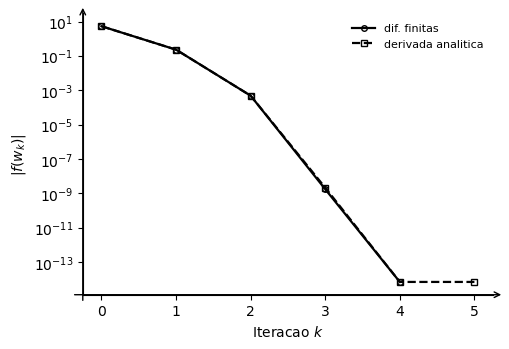

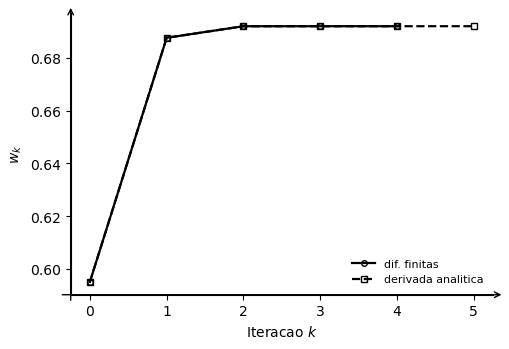

In [4]:
#| echo: false
#| warning: false
#| error: false

# Newton–Raphson (diferença progressiva vs. derivada analítica)
# Variáveis conforme a apresentação: xi(w), xi'(w)
# Dois gráficos P&B com setas: 1) |f(w_k)| por iteração; 2) w_k por iteração

import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

# ===== estilo global (P&B, sem grid, traços distintos) =====
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.prop_cycle'] = cycler('color', ['k']) * cycler('linestyle', ['-', '--'])
plt.rcParams['lines.linewidth'] = 1.6
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['legend.frameon'] = False

def axes_minimal_with_arrows(ax):
    # mostra só eixos esquerdo e inferior + setas nas extremidades
    for side in ('top', 'right'):
        ax.spines[side].set_visible(False)
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.annotate('', xy=(1.02, 0.0), xytext=(-0.02, 0.0),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))
    ax.annotate('', xy=(0.0, 1.02), xytext=(0.0, -0.02),
                xycoords='axes fraction',
                arrowprops=dict(arrowstyle='->', lw=1.0, shrinkA=0, shrinkB=0))

# ===== parâmetros =====
Q  = 50.0   # kW
Te = 30.0   # °C
Tv = 50.0   # °C
cp = 4.2    # kJ/(kg·K)
A  = 1.4    # m^2
a  = 0.0445
b  = 0.185
dT = Tv - Te

# ===== definicoes conforme a teoria =====
def xi(w):
    # xi(w) = -A / [cp (a w^0.2 + b w)]
    return -A / (cp*(a*w**0.2 + b*w))

def xip(w):
    # xi'(w) = A (0.2 a w^-0.8 + b) / [cp (a w^0.2 + b w)^2]
    return A*(0.2*a*w**(-0.8) + b) / (cp*(a*w**0.2 + b*w)**2)

def f(w):
    # f(w) = Q - w cp dT [1 - exp(xi(w))]
    return Q - w*cp*dT*(1.0 - np.exp(xi(w)))

def fprime_analitica(w):
    # f'(w) = -cp dT [1 - e^{xi} - w e^{xi} xi'(w)]
    e = np.exp(xi(w))
    return -cp*dT*(1.0 - e - w*e*xip(w))

# ===== Newton com histórico =====
# hist guarda tuplas (k, w_k, f_k)
def newton_df_hist(w0, tol=1e-10, maxit=50):
    w = float(w0); hist = []
    for k in range(maxit):
        fw = f(w)
        h  = 1e-6*(1.0 + abs(w))
        df = (f(w+h) - fw)/h
        hist.append((k, w, fw))
        w_new = w - fw/df
        if abs(w_new - w) <= tol:
            w = w_new
            hist.append((k+1, w, f(w)))
            break
        w = w_new
    return w, hist

def newton_an_hist(w0, tol=1e-12, maxit=50):
    w = float(w0); hist = []
    for k in range(maxit):
        fw = f(w)
        dfa = fprime_analitica(w)
        hist.append((k, w, fw))
        w_new = w - fw/dfa
        if abs(w_new - w) <= tol:
            w = w_new
            hist.append((k+1, w, f(w)))
            break
        w = w_new
    return w, hist

# ===== execucao =====
w0 = Q/(cp*dT)  # palpite inicial simples
w_fd, Hfd = newton_df_hist(w0)
w_an, Han = newton_an_hist(w0)

print(f"Newton (dif. finitas): w = {w_fd:.6f} kg/s, f(w) = {f(w_fd):.6e} kW")
print(f"Newton (derivada analitica): w = {w_an:.6f} kg/s, f(w) = {f(w_an):.6e} kW")

# checagem local de f' em w_an
h_ref = 1e-6*(1.0 + abs(w_an))
df_fd = (f(w_an + h_ref) - f(w_an))/h_ref
df_an = fprime_analitica(w_an)
rel = abs(df_fd - df_an)/max(1.0, abs(df_an))
print(f"f'(w≈{w_an:.6f}): df={df_fd:.6e}, analitica={df_an:.6e}, erro_rel={rel:.3e}")

# ===== dados para graficos =====
k_fd  = np.array([t[0] for t in Hfd], dtype=float)
fw_fd = np.array([t[2] for t in Hfd], dtype=float)
wseq_fd = np.array([t[1] for t in Hfd], dtype=float)

k_an  = np.array([t[0] for t in Han], dtype=float)
fw_an = np.array([t[2] for t in Han], dtype=float)
wseq_an = np.array([t[1] for t in Han], dtype=float)

# ===== grafico 1: |f(w_k)| por iteracao (semilogy) =====
fig1, ax1 = plt.subplots(figsize=(5.2, 3.6))
ax1.semilogy(k_fd, np.abs(fw_fd), marker='o', markersize=4, fillstyle='none', label='dif. finitas')
ax1.semilogy(k_an, np.abs(fw_an), marker='s', markersize=4, fillstyle='none', linestyle='--', label='derivada analitica')
ax1.set_xlabel(r'Iteracao $k$')
ax1.set_ylabel(r'$|f(w_k)|$')
ax1.legend()
axes_minimal_with_arrows(ax1)
plt.tight_layout(); plt.show()

# ===== grafico 2: w_k por iteracao =====
fig2, ax2 = plt.subplots(figsize=(5.2, 3.6))
ax2.plot(k_fd, wseq_fd, marker='o', markersize=4, fillstyle='none', label='dif. finitas')
ax2.plot(k_an, wseq_an, marker='s', markersize=4, fillstyle='none', linestyle='--', label='derivada analitica')
ax2.set_xlabel(r'Iteracao $k$')
ax2.set_ylabel(r'$w_k$')
ax2.legend()
axes_minimal_with_arrows(ax2)
plt.tight_layout(); plt.show()


<figure style="margin: 0 0 1.25rem 0; text-align:center;">
  <figcaption><b>Figura 4.</b> Convergência de $f(w)$ e $w$ para cada iteração de Newton-Raphson.</figcaption>
</figure>


## Discussão dos Aspectos Numéricos

### Comportamento de Newton–Raphson neste problema
Com o palpite simples
$$
w_0 \approx \frac{Q}{c_p\,\Delta T},
$$
as iterações convergiram de forma rápida e estável para a raiz $w^*$. Observou-se queda acentuada de $|f(w_k)|$ a cada passo e sequência $w_k$ rapidamente estabilizada. A suavidade de
$$
f(w)=Q-w\,c_p\,\Delta T\,[1-\exp(\xi(w))],\qquad 
\xi(w)=-\frac{A}{c_p\,(a\,w^{0.2}+b\,w)},
$$
no domínio visitado favoreceu esse comportamento.

### Diferença entre as duas derivadas neste problema
A derivada analítica,
$$
f'(w)=-c_p\,\Delta T\,[1-\exp(\xi)-w\,\exp(\xi)\,\xi'(w)],\qquad
\xi'(w)=\frac{A\,(0.2\,a\,w^{-0.8}+b)}{c_p\,[a\,w^{0.2}+b\,w]^2},
$$
e a aproximação por diferença finita à frente,
$$
f'(w)\approx\frac{f(w+h)-f(w)}{h},
$$
levaram ao mesmo $w^*$ e com número de iterações muito parecido. Aqui isso acontece porque $f$ é suave e o passo $h$ 
foi estável. 
    
### Comportamento de Newton–Raphson em geral
Newton–Raphson é muito rápido **quando** há bom palpite, $f$ e $f'$ são regulares perto da raiz e a direção de 
passo é confiável. Fora dessas condições, pode oscilar, divergir ou sair do domínio, o que pode necessitar de técnicas
adicionais mais robustas.

### Diferença entre as duas derivadas em geral
A derivada analítica reduz iterações e evita a sensibilidade à escolha de $h$; vale especialmente quando se busca tolerâncias finas ou quando avaliar $f$ é caro. A diferença finita é universal e simples, mas equilibra erro de truncamento e arredondamento via $h$ e pode reduzir a ordem efetiva de convergência.

> **Resumo final:** quando disponível, use $f'(w)$ analítica; quando não, diferença finita bem escolhida resolve. Primeiro faça funcionar, depois refine.


## Discussão Final

Nesta *nota de estudo*, nós revisamos o **Método de Newton-Raphson** usando como exemplo um trocador de calor com condensação
coeficiente global de transferência de calor ($U$) variando com a vazão ($w$). Seguimos os seguintes passos:

 1. Construção do modelo matemático 
 2. Análise de assíntotas do modelo matemático nos limites de $w$    
 3. Análise paramétrica de como várias grandezas (*i.e.*, $U$, $T_s$ e $Q$) variam com o aumento da vazão    
 4. Estudo da influência da variação de $U$ com $w$ em relação a um modelo com $U$ constante    
 5. Revisão do Método de Newton Raphson         
 6. Cálculo numérico da derivada que usando a aproximação das diferenças finitas à frente    
 7. Cálculo analítico da derivada que aparece em Newton-Raphson    
 8. Análise do resultado obtido por Newton-Raphon    

Desta forma, aproveitamos um exemplo real para revisar a construção de um modelo matemático, o estudo de suas assíntotas e
do seu comportamento em função dos parâmetros, e finalmente encontramos a solução do problema utilizando um famoso
método numérico.

## Novos Exercícios Práticos

- Estimar $U(w)$ com correlações empíricas    
- Estudar a influência de $A$, $\Delta T$ e $c_p$ no comportamento do trocador de calor.
- Experimente outros valores iniciais de $w$ para estudar a convergência de Newton-Raphson.
- Procure na literatura científica dados experimentais de *U(w)*, ajuste os dados por mínimos quadrados e refaça este estudo.
- Estime a perda de carga no trocador em função de $w$ e estime os custos de bombeamento para cada condição.
- Faça uma propagação de incertezas dos parâmetros para $W$ e para a raiz de *f(W)*.
- Implemente outros métodos e compare com o Newton-Raphson que vimos nesta *nota de estudo*  
  - Clássicos (*e.g.*, Bisseção, Busca Exaustiva).  
  - Newton-Raphson e variações (*e.g.*, Secante, Newton Amortecido, Newton *Safeguarded*). 
  - Alternativos (*e.g.*, Ponto Fixo, *Regula Falsi*, Brent)  
- Pesquise outros métodos de obtenção de raizes de funções.